In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [46]:
# Read the csv file to explore data

data = pd.read_csv('HousingPrices-Amsterdam-August-2021.csv')

In [47]:
# Get some basic statistics on Housing prices data

data.describe()

,Unnamed: 0,Price,Area,Room,Lon,Lat
count,924.000000,9.200000e+02,924.000000,924.000000,924.000000,924.000000
mean,462.500000,6.220654e+05,95.952381,3.571429,4.888605,52.363326
std,266.880123,5.389942e+05,57.447436,1.592332,0.053140,0.024028
min,1.000000,1.750000e+05,21.000000,1.000000,4.644819,52.291519
25%,231.750000,3.500000e+05,60.750000,3.000000,4.855834,52.352077
50%,462.500000,4.670000e+05,83.000000,3.000000,4.886818,52.364631
75%,693.250000,7.000000e+05,113.000000,4.000000,4.922337,52.377598
max,924.000000,5.950000e+06,623.000000,14.000000,5.029122,52.423805


In [48]:
# Getting the idea of data features and number of data points.

print(f"The data has rows -  {data.shape[0]} and columns - {data.shape[1]} \n")

print("Below are the data types")
print(data.dtypes)

The data has rows -  924 and columns - 8 

Below are the data types
Unnamed: 0      int64
Address        object
Zip            object
Price         float64
Area            int64
Room            int64
Lon           float64
Lat           float64
dtype: object


In [49]:
"""
    Does the similar job of a pivot table.
    I am displaying the mean, median and mode of the quantitative data.
"""
def print_univariate_analysis(df, key):
    if df[key].dtype == "object" or df[key].dtype == "string":
        return
    print(f"For key - {key} \n")
    print(f"Mean - {df[key].mean()}, Median - {df[key].median()}, Mode - {df[key].mode()} \n")

cols = data.columns

for col in cols[1:]:
    print_univariate_analysis(data, col)

For key - Price 

Mean - 622065.4195652173, Median - 467000.0, Mode - 0    375000.0
Name: Price, dtype: float64 

For key - Area 

Mean - 95.95238095238095, Median - 83.0, Mode - 0    78
Name: Area, dtype: int64 

For key - Room 

Mean - 3.5714285714285716, Median - 3.0, Mode - 0    3
Name: Room, dtype: int64 

For key - Lon 

Mean - 4.888605288250209, Median - 4.886818, Mode - 0    4.855832
Name: Lon, dtype: float64 

For key - Lat 

Mean - 52.36332596618137, Median - 52.364631, Mode - 0    52.352385
Name: Lat, dtype: float64 



Description of col - Address

count                           924
unique                          919
top       Quashibastraat, Amsterdam
freq                              2
Name: Address, dtype: object
None
Description of col - Zip

count         924
unique        834
top       1075 XR
freq            5
Name: Zip, dtype: object
None


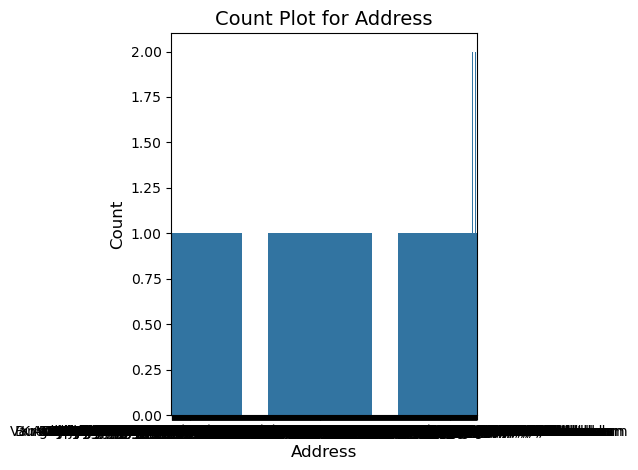

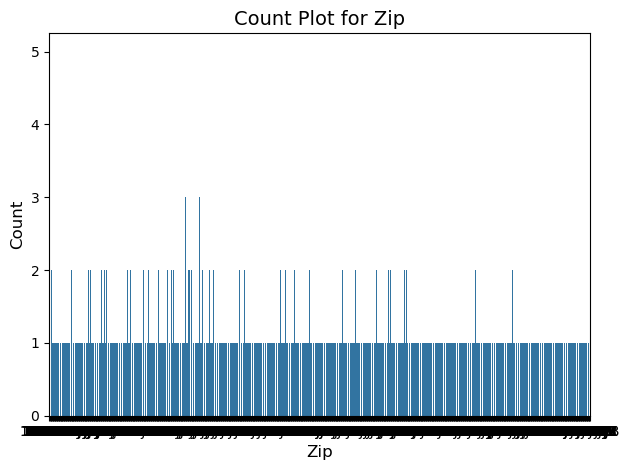

"\n    Since we see that almost all entries of this categorical variable are unique, we will see most of the count as 1.\n    It doesn't make much sense to use countplot on this categorical data.\n"

In [50]:
# For categorical data, we plot count plots

categorical_cols = ["Address", "Zip"]

def cat_col_describe(data, col):
    print(f"Description of col - {col}\n")
    print(data[col].describe())

for col_name in categorical_cols:
    print(cat_col_describe(data, col_name))

def print_categorical_data(df, key):
    if df[key].dtype == "object":
        sns.countplot(x = key, data=df)
        plt.title(f'Count Plot for {key}', fontsize=14)
        plt.xlabel(key.capitalize(), fontsize=12)
        plt.ylabel('Count', fontsize=12)

        plt.tight_layout()  # Fix spacing
        plt.show()

for col in cols[1:]:
    print_categorical_data(data, col)


"""
    Since we see that almost all entries of this categorical variable are unique, we will see most of the count as 1.
    It doesn't make much sense to use countplot on this categorical data.
"""

In [51]:
"""
    Seperating the quantitative columns to print the scatter plots.
"""

plot_cols = data.columns.tolist()[1:]

quant_cols = []

for col in plot_cols:
    if data[col].dtype != "object":
        quant_cols.append(col)

print(quant_cols)

['Price', 'Area', 'Room', 'Lon', 'Lat']


  25th percentile (Q1): 350000.0, 50th percentile (Median): 467000.0, 75th percentile (Q3): 700000.0


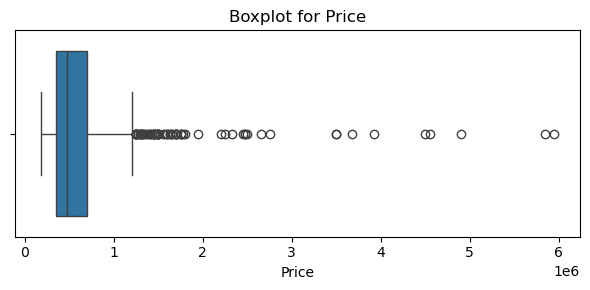

  25th percentile (Q1): 60.75, 50th percentile (Median): 83.0, 75th percentile (Q3): 113.0


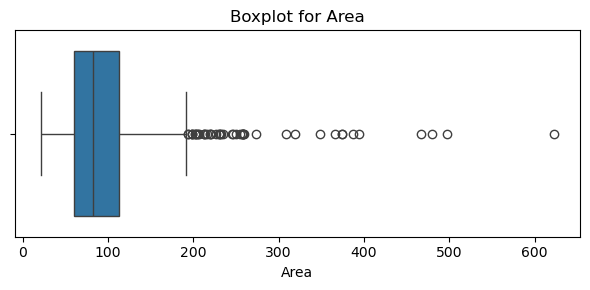

  25th percentile (Q1): 3.0, 50th percentile (Median): 3.0, 75th percentile (Q3): 4.0


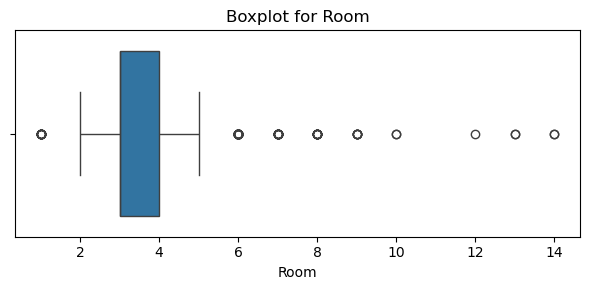

  25th percentile (Q1): 4.85583425, 50th percentile (Median): 4.886818, 75th percentile (Q3): 4.922337499999999


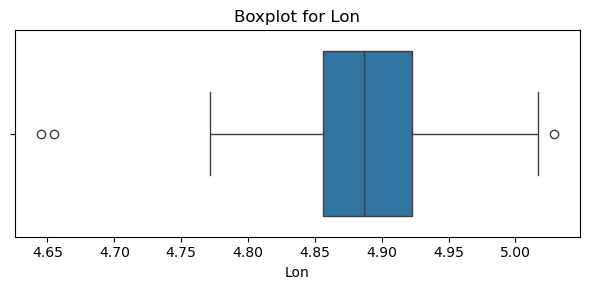

  25th percentile (Q1): 52.35207675, 50th percentile (Median): 52.364631, 75th percentile (Q3): 52.377598


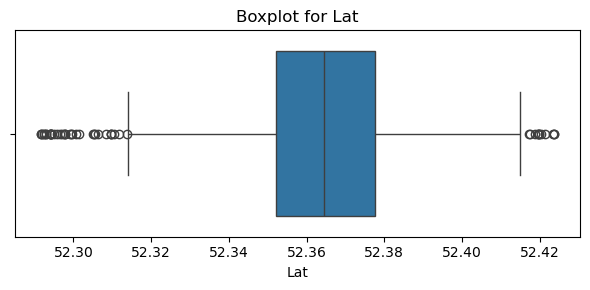

In [52]:
"""
    Printing box plots to get an idea of the quartile ranges and outliers.
"""

for col in quant_cols:
    q25 = data[col].quantile(0.25)
    q50 = data[col].quantile(0.50)
    q75 = data[col].quantile(0.75)

    print(f"  25th percentile (Q1): {q25}, 50th percentile (Median): {q50}, 75th percentile (Q3): {q75}")

    plt.figure(figsize=(6, 3))
    sns.boxplot(data=data, x=col)
    plt.title(f"Boxplot for {col}")
    plt.tight_layout()
    plt.show()

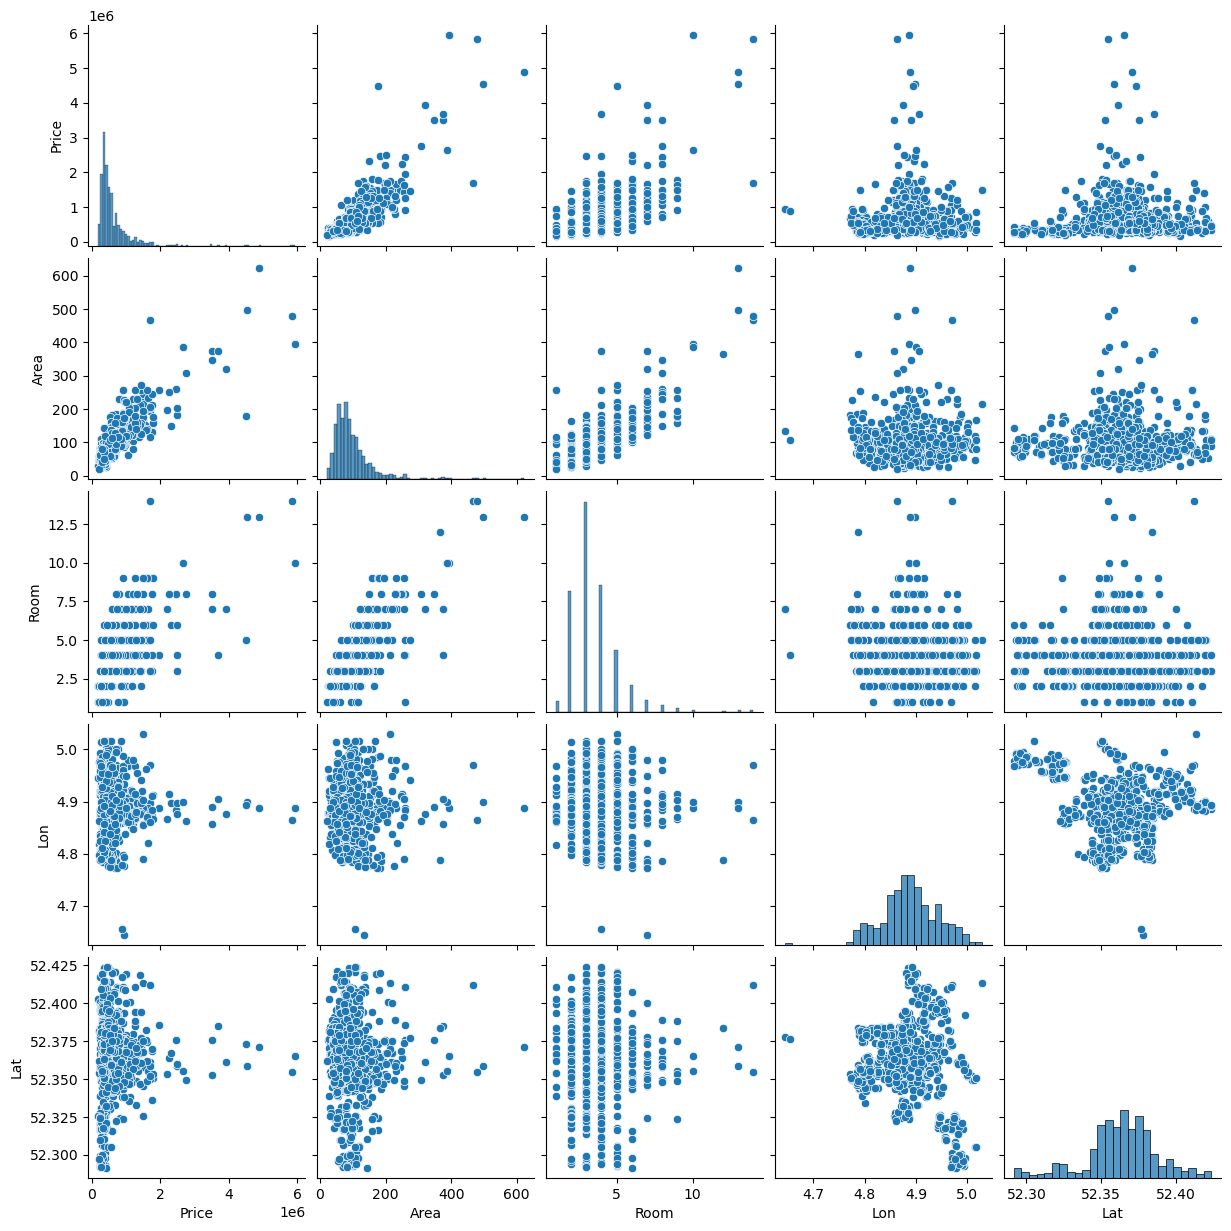

In [53]:
"""
    Plot of pair plots strictly quantitative data types.
"""
sns.pairplot(data[quant_cols])

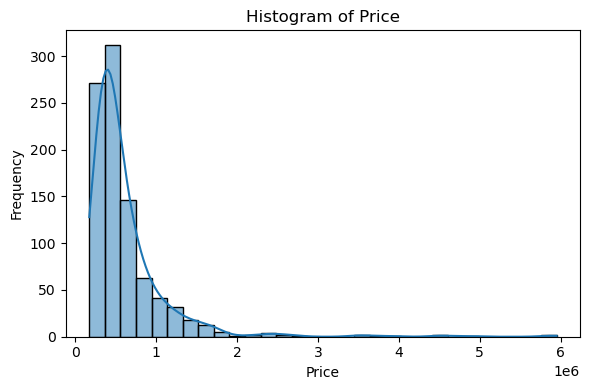

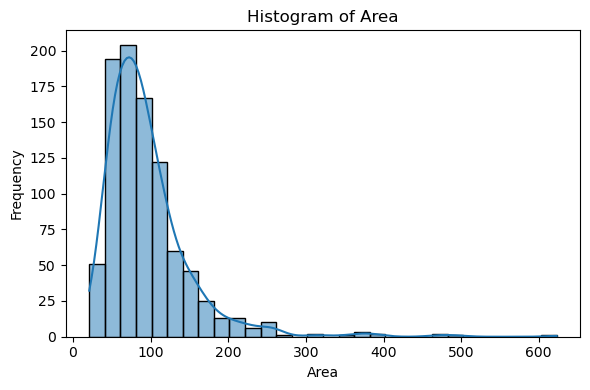

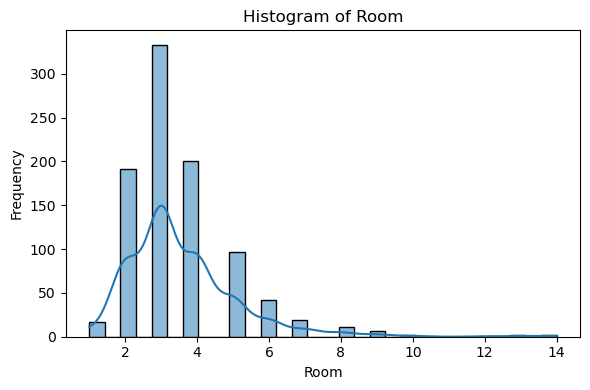

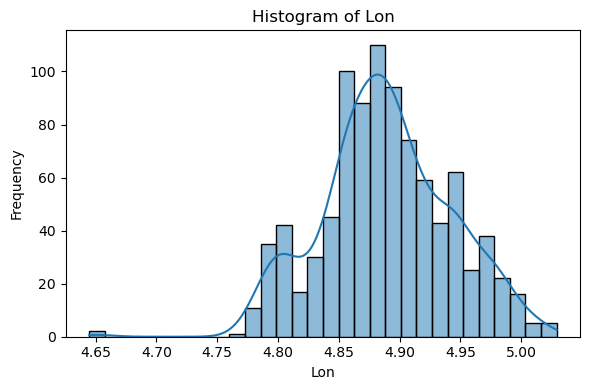

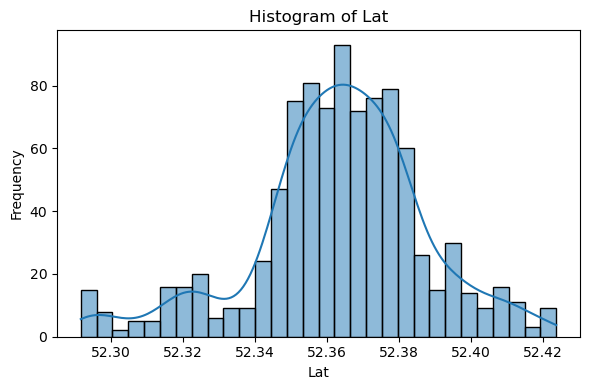

In [55]:
"""
    Plotting histograms
"""

for col in quant_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

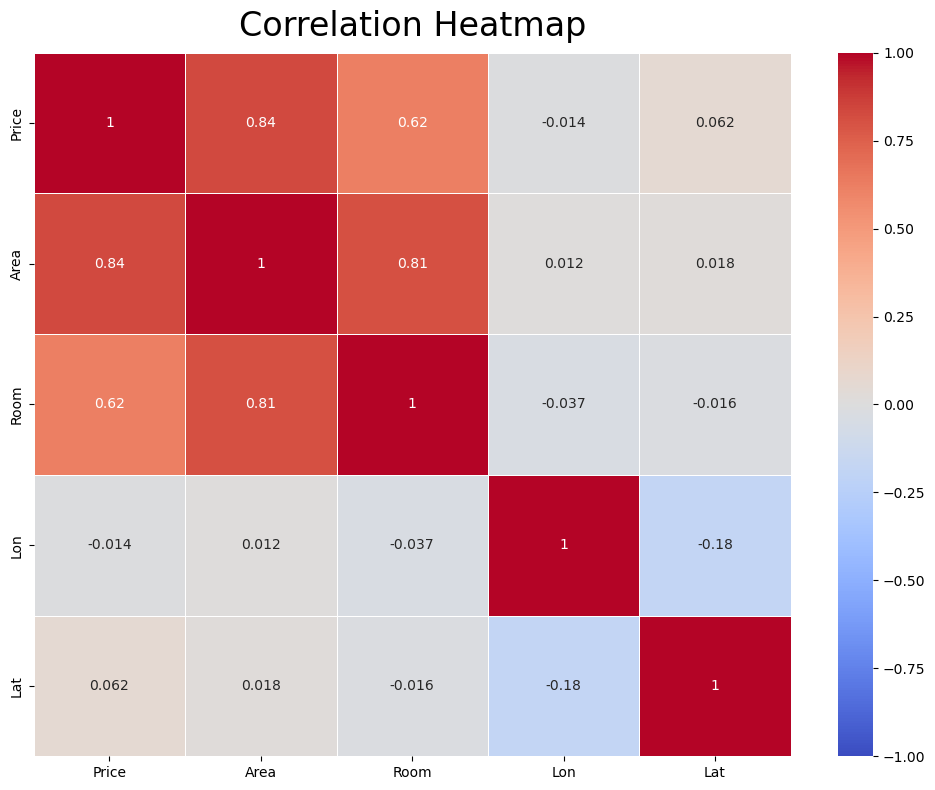

In [58]:
"""
    Plotting correlation matrix from the given data.
"""


plt.figure(figsize=(10, 8))

corr_matrix = data[quant_cols].corr()


heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm', linewidths=0.5)


heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 24}, pad=12)
plt.tight_layout()
plt.show()

In [60]:
"""
    Report

    From the given housing data we see that we have 8 columns.
    There are 7 data feature columns like ['Price', 'Area', 'Room', 'Lon', 'Lat', 'Address', 'Zip']

    Out of them ['Price', 'Area', 'Room', 'Lon', 'Lat'] are quantitative features.
    ['Address', 'Zip'] are categorical values that are of minimal use.

    From the histograms and pair plots we can see that:
    The price feature has median value of 467000.0 and there are some outliers around 1e6 value.
    The area has median of 83 but there are some outliers/max values till 600.
    The room median value is 3 and there are very few entries with room around 14.
    The lat, longitudes are values of co-ordinates most of the houses are 52.36 lat and 4.88 longitude.

    From the correlation matrix we can see that the features Room and Area show strong correlation.
    The features Price and Area also show strong correlation.
    That means there is an underlying trend between these 3 features.

    The Address and Zip code values are quite unique with very few repititions.

    In this experiment we used different tools like pairplots and histogram plots and others
    to study the trends.

    We performed both univariate and multivariate EDA analysis.
"""

"\n    Report\n\n    From the given housing data we see that we have 8 columns.\n    There are 7 data feature columns like ['Price', 'Area', 'Room', 'Lon', 'Lat', 'Address', 'Zip']\n\n    Out of them ['Price', 'Area', 'Room', 'Lon', 'Lat'] are quantitative features.\n    ['Address', 'Zip'] are categorical values that are of minimal use.\n\n    From the histograms and pair plots we can see that:\n    The price feature has median value of 467000.0 and there are some outliers around 1e6 value.\n    The area has median of 83 but there are some outliers/max values till 600.\n    The room median value is 3 and there are very few entries with room around 14.\n    The lat, longitudes are values of co-ordinates most of the houses are 52.36 lat and 4.88 longitude.\n\n    From the correlation matrix we can see that the features Room and Area show strong correlation.\n    The features Price and Area also show strong correlation.\n    That means there is an underlying trend between these 3 features